In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import skew, kurtosis

In [ ]:
# Load the Data
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target

display(df.head())
print(df.info())
print(df.describe())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
2

In [ ]:
# Check for Missing Values
print("Missing values in dataset:")
print(df.isnull().sum())

Missing values in dataset:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64


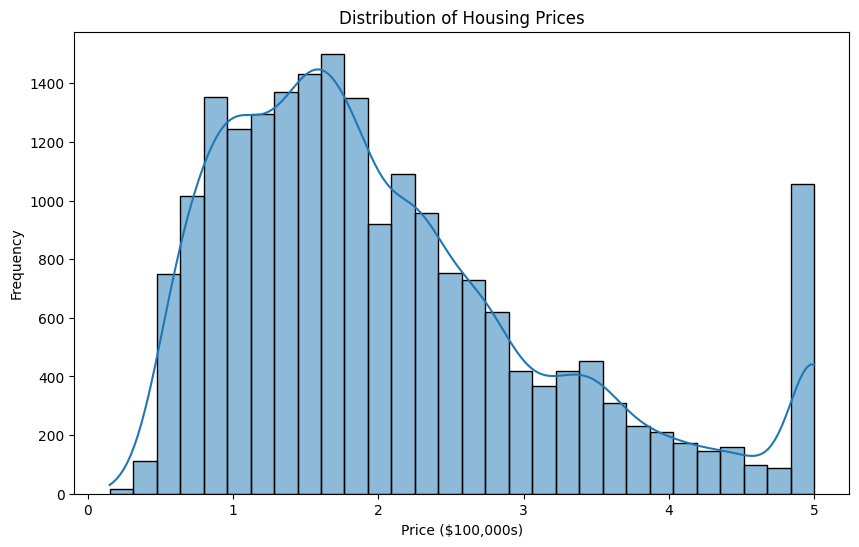

In [ ]:
# Step 1: Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 6))
sns.histplot(df['Target'], bins=30, kde=True)
plt.title("Distribution of Housing Prices")
plt.xlabel("Price ($100,000s)")
plt.ylabel("Frequency")
plt.show()

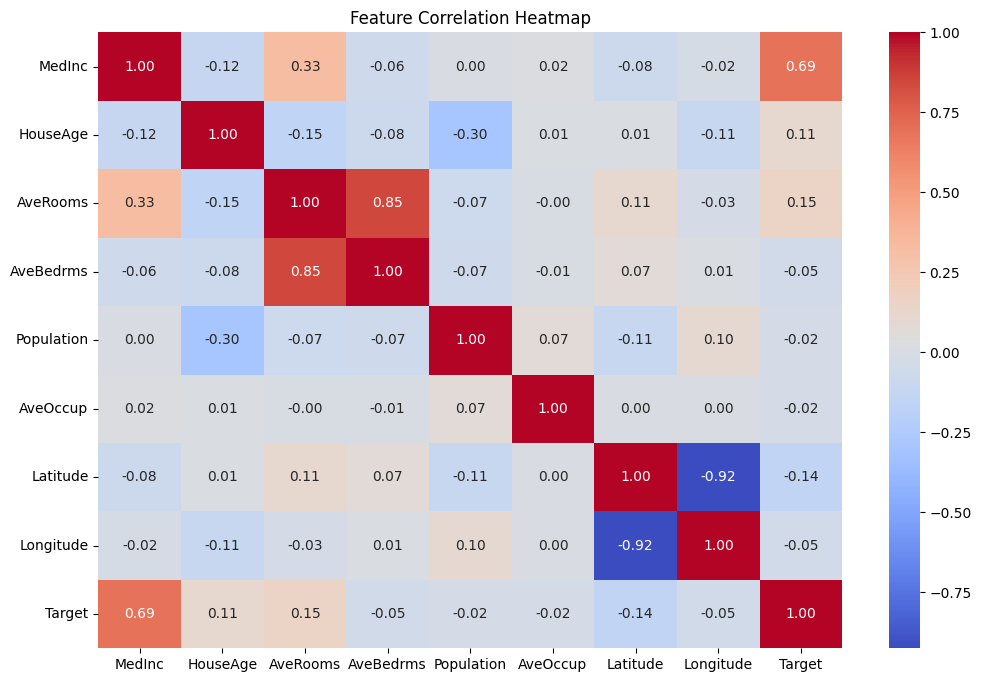

In [ ]:
# Step 2: Correlation Analysis
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
# Step 3: Skewness and Kurtosis Analysis
skew_values = df.apply(lambda x: skew(x))
kurtosis_values = df.apply(lambda x: kurtosis(x))
print("Feature Skewness:")
print(skew_values)
print("\nFeature Kurtosis:")
print(kurtosis_values)

Feature Skewness:
MedInc         1.646537
HouseAge       0.060326
AveRooms      20.696365
AveBedrms     31.314680
Population     4.935500
AveOccup      97.632465
Latitude       0.465919
Longitude     -0.297780
Target         0.977692
dtype: float64

Feature Kurtosis:
MedInc            4.951034
HouseAge         -0.800726
AveRooms        879.139966
AveBedrms      1636.315218
Population       73.535009
AveOccup      10648.430334
Latitude         -1.117780
Longitude        -1.330121
Target            0.327500
dtype: float64


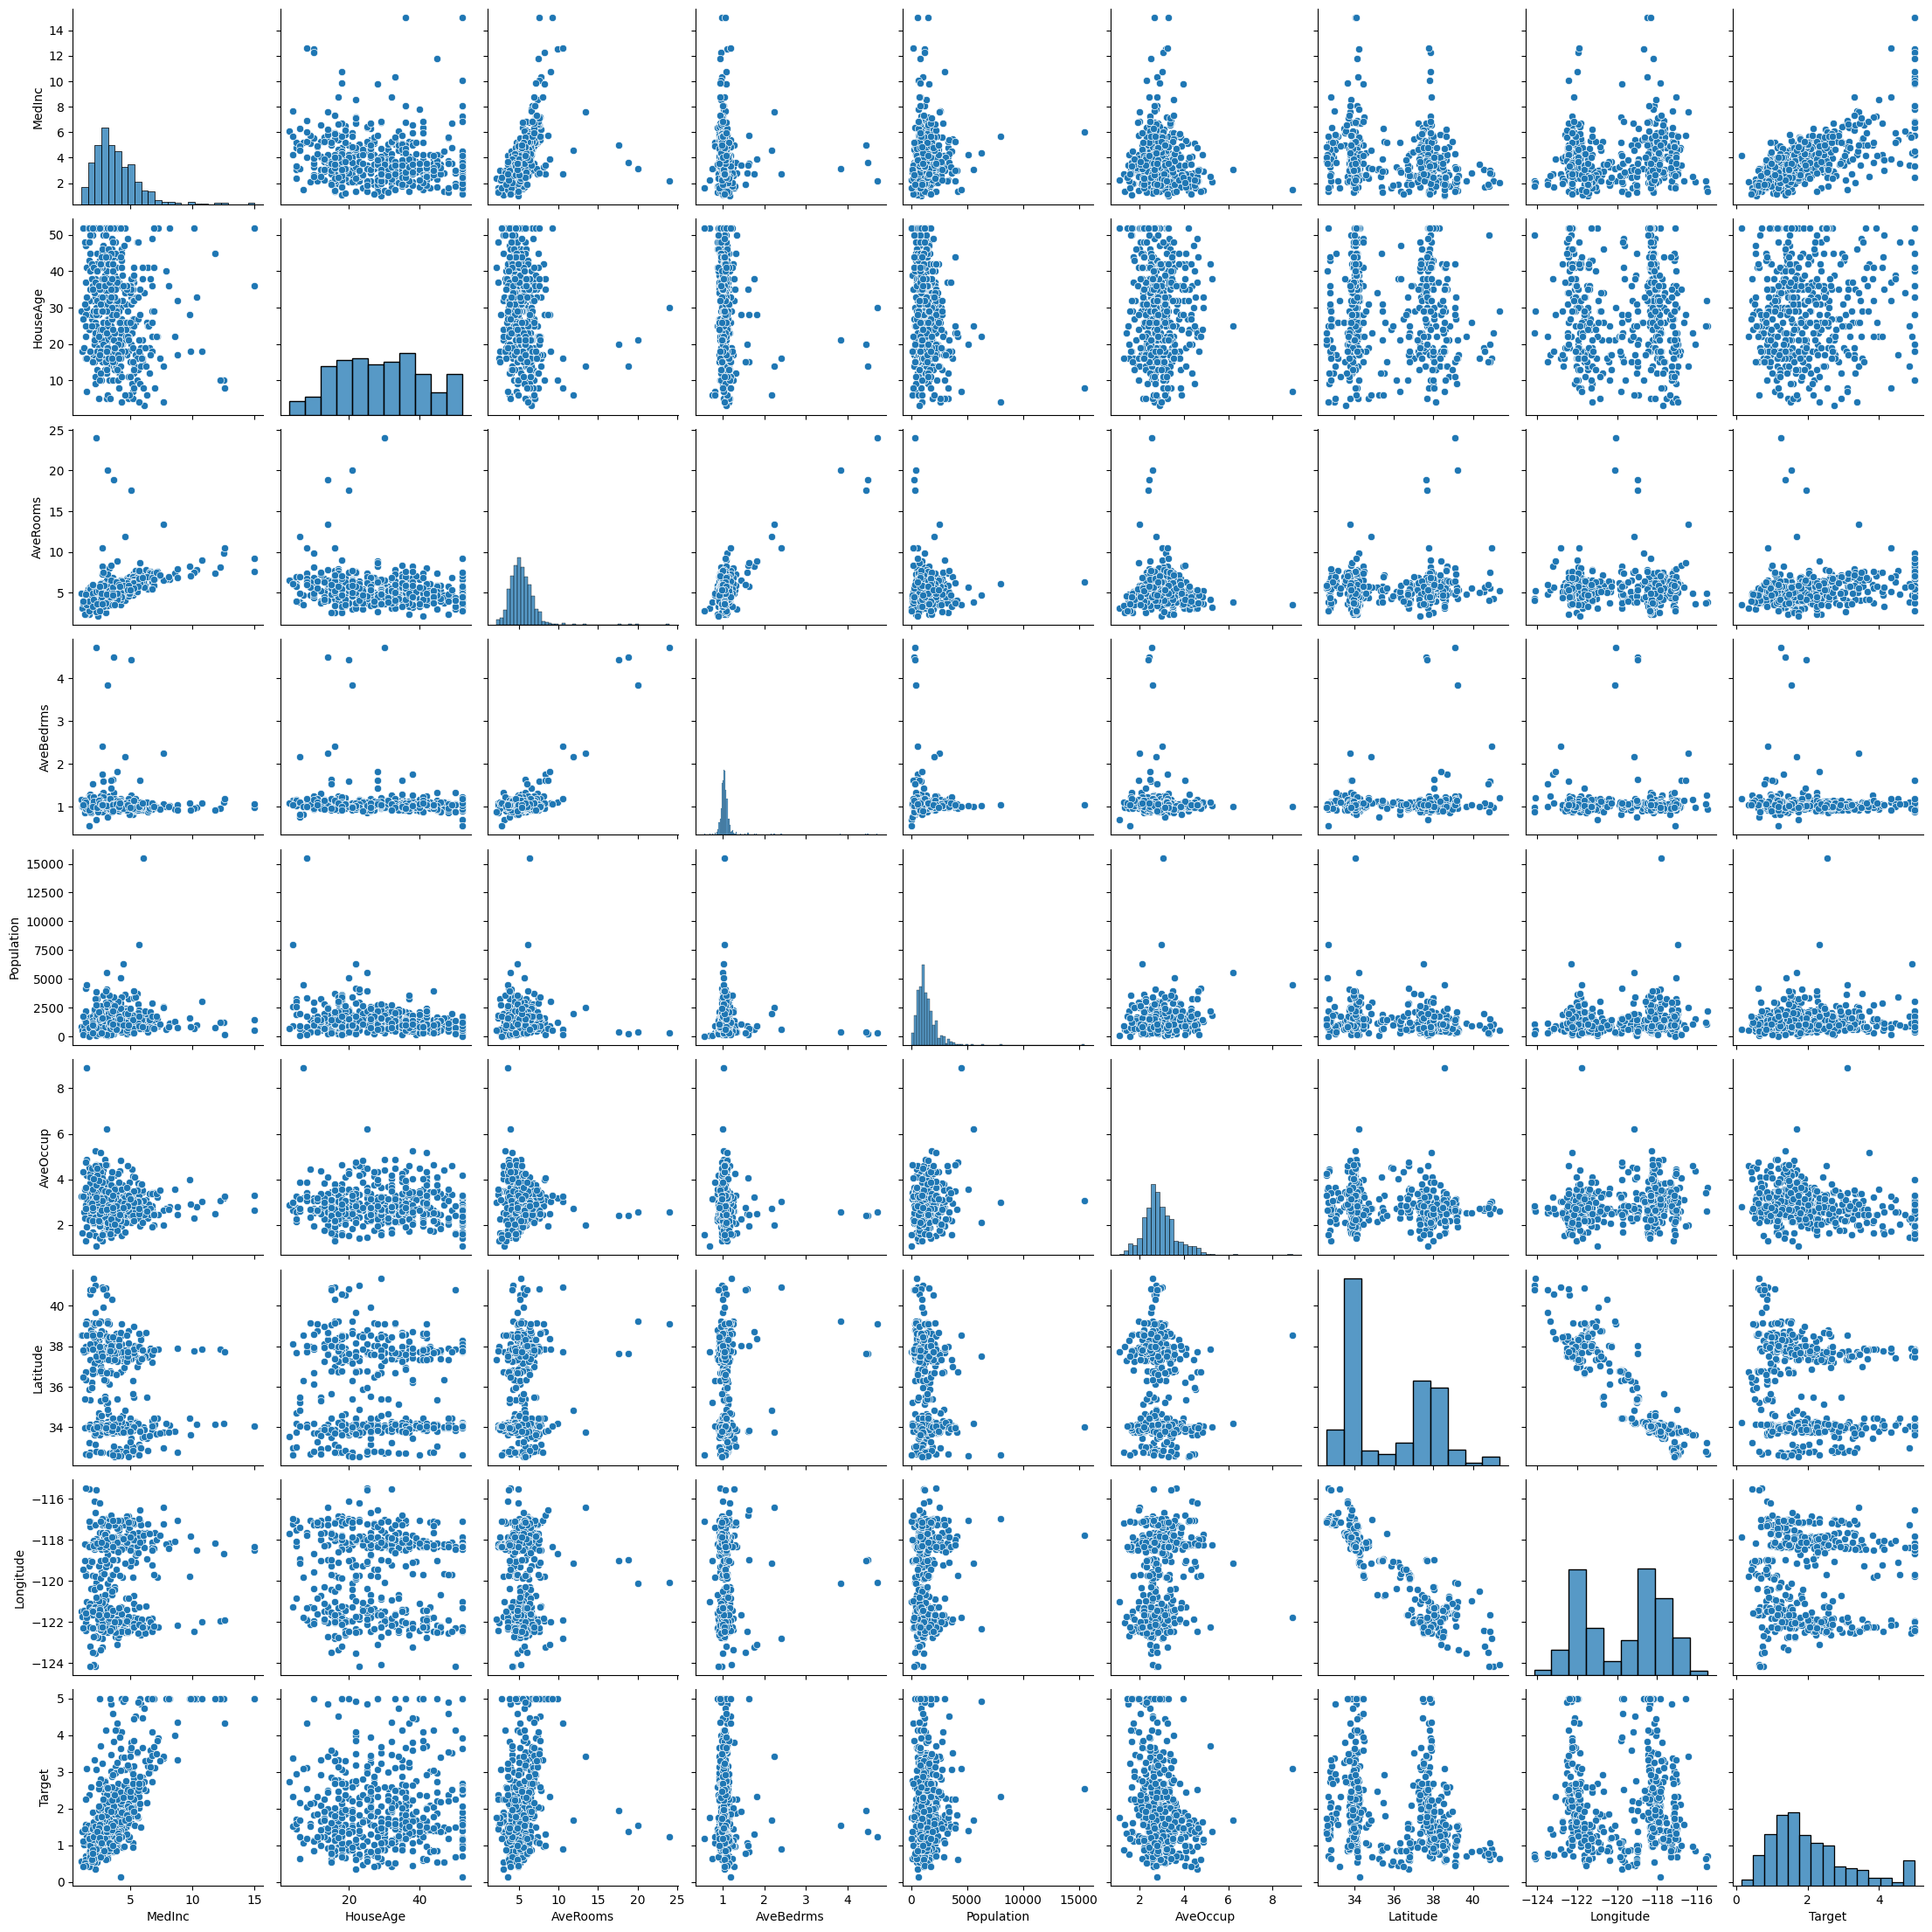

In [ ]:
# Step 4: Pairplot Analysis
sns.pairplot(df.sample(500))
plt.show()

In [ ]:
# Step 5: Predictive Modeling
X = df.drop(columns=['Target'])
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Squared Error: 0.56
R-squared Score: 0.58


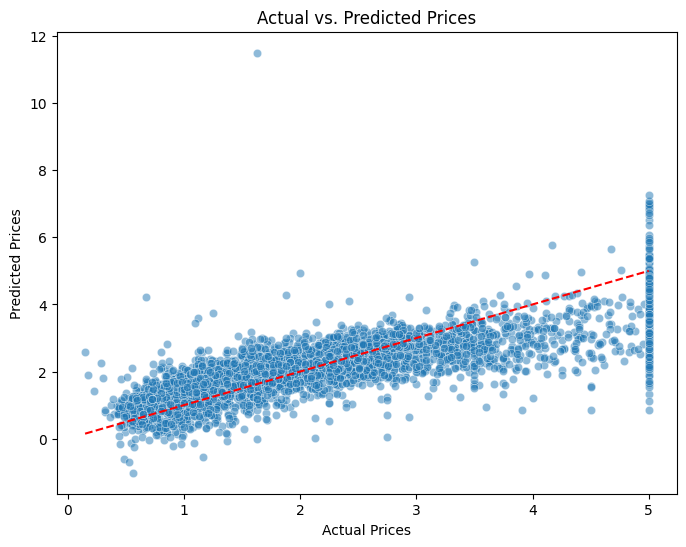

In [ ]:
# Visualization of Predictions
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.show()